## Hotel Performance.
#### This study is aimed at finding the performance (revenue generated) of an anonymous hotel based on:

- **Number of visitors**.
- **Amount spend on marketing**.
- **If there is promotion or not**.
- **Day of the week**.
- **Weekly and monthly performance**.
>The data source is from Kaggle.com and contains the following columns:Date, Week, Week_ID, Month, Month_ID, Year, Day_Name, Visitors, Revenue, Marketing Spend & Promo.
The main visualization tool used in this study is Seaborn.
   <a id="top_page"><a/>


### Python Libraries Used:
* Pandas
* Matplotlib
* Seaborn
* Numpy

In [212]:
#Intalling/ importing packages
import os #This provide fucntion for the interaction with the operating system.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') #this helps filter uneccesary warnings.

### 1) Loading the Raw Data.

In [213]:
#loading raw data as a csv file.
#Raw data= data frame(df)
#df=pd.read_csv("Marketing Raw Data.csv")
df=pd.read_csv("Marketing Raw Data.csv")
df

,Date,Week,Week_ID,Month,Month_ID,Year,Day_Name,Visitors,Revenue,Marketing Spend,Promo
0,9/11/2020,46,34,11,11,2020,Monday,707,465,651.375000,No Promo
1,10/11/2020,46,34,11,11,2020,Tuesday,1455,10386,1298.250000,Promotion Red
2,11/11/2020,46,34,11,11,2020,Wednesday,1520,12475,1559.375000,Promotion Blue
3,12/11/2020,46,34,11,11,2020,Thursday,1726,11712,1801.750000,No Promo
4,13/11/2020,46,34,11,11,2020,Friday,2134,10000,2614.500000,No Promo
...,...,...,...,...,...,...,...,...,...,...,...
177,5/5/2021,19,60,5,17,2021,Wednesday,1400,7284,1119.600000,No Promo
178,6/5/2021,19,60,5,17,2021,Thursday,2244,13021,2067.888889,Promotion Red
179,7/5/2021,19,60,5,17,2021,Friday,2023,4587,1450.200000,No Promo
180,8/5/2021,19,60,5,17,2021,Saturday,1483,5927,1121.875000,No Promo


### Basic Explorations.

In [214]:
#To print out just the top 5 rows of the dataset.
df.head()

,Date,Week,Week_ID,Month,Month_ID,Year,Day_Name,Visitors,Revenue,Marketing Spend,Promo
0,9/11/2020,46,34,11,11,2020,Monday,707,465,651.375,No Promo
1,10/11/2020,46,34,11,11,2020,Tuesday,1455,10386,1298.250,Promotion Red
2,11/11/2020,46,34,11,11,2020,Wednesday,1520,12475,1559.375,Promotion Blue
3,12/11/2020,46,34,11,11,2020,Thursday,1726,11712,1801.750,No Promo
4,13/11/2020,46,34,11,11,2020,Friday,2134,10000,2614.500,No Promo


In [215]:
#To print out just the last 5 rows of the dataset.
df.tail()

,Date,Week,Week_ID,Month,Month_ID,Year,Day_Name,Visitors,Revenue,Marketing Spend,Promo
177,5/5/2021,19,60,5,17,2021,Wednesday,1400,7284,1119.600000,No Promo
178,6/5/2021,19,60,5,17,2021,Thursday,2244,13021,2067.888889,Promotion Red
179,7/5/2021,19,60,5,17,2021,Friday,2023,4587,1450.200000,No Promo
180,8/5/2021,19,60,5,17,2021,Saturday,1483,5927,1121.875000,No Promo
181,9/5/2021,20,61,5,17,2021,Sunday,1303,3861,871.000000,No Promo


In [216]:
# Generating a summary of our data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 11 columns):
Date               182 non-null object
Week               182 non-null int64
Week_ID            182 non-null int64
Month              182 non-null int64
Month_ID           182 non-null int64
Year               182 non-null int64
Day_Name           182 non-null object
Visitors           182 non-null int64
Revenue            182 non-null int64
Marketing Spend    182 non-null float64
Promo              182 non-null object
dtypes: float64(1), int64(7), object(3)
memory usage: 15.8+ KB


In [217]:
# Statistical summary
df.describe()

,Week,Week_ID,Month,Month_ID,Year,Visitors,Revenue,Marketing Spend
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,21.785714,47.351648,5.269231,13.774725,2020.708791,1666.730769,10581.593407,1396.356564
std,18.369841,7.892053,4.204580,1.783540,0.455573,503.528049,6297.626426,691.867416
min,1.000000,34.000000,1.000000,11.000000,2020.000000,488.000000,292.000000,322.000000
25%,8.000000,40.000000,2.000000,12.000000,2020.000000,1339.000000,5929.500000,880.431250
50%,14.000000,48.000000,4.000000,14.000000,2021.000000,1546.000000,9452.000000,1223.900000
75%,47.000000,54.000000,11.000000,15.000000,2021.000000,2027.500000,12959.500000,1676.450000
max,53.000000,61.000000,12.000000,17.000000,2021.000000,4139.000000,36283.000000,4535.375000


In [218]:
# Looking into the number of rows and columns.
df.shape

(182, 11)

In [219]:
# Reading the (Headings) columns.
df.columns

Index(['Date', 'Week', 'Week_ID', 'Month', 'Month_ID', 'Year', 'Day_Name',
       'Visitors', 'Revenue', 'Marketing Spend', 'Promo'],
      dtype='object')

In [220]:
# Generating an array of week days in our dataframe.
df["Day_Name"].unique()


array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [221]:
# Displaying 10 highest number of Visitors recorded in a day.
Most_visitors= df.sort_values("Visitors").tail(10)
Most_visitors

,Date,Week,Week_ID,Month,Month_ID,Year,Day_Name,Visitors,Revenue,Marketing Spend,Promo
30,9/12/2020,50,38,12,12,2020,Wednesday,2464,12740,1811.111111,No Promo
74,22/01/2021,4,45,1,13,2021,Friday,2482,24417,2713.000000,Promotion Blue
109,26/02/2021,9,50,2,14,2021,Friday,2553,26608,2418.909091,Promotion Blue
45,24/12/2020,52,40,12,12,2020,Thursday,2556,15991,1955.000000,No Promo
136,25/03/2021,13,54,3,15,2021,Thursday,2611,11524,2837.625000,Promotion Red
14,23/11/2020,48,36,11,11,2020,Monday,2632,34278,4284.750000,Promotion Blue
47,26/12/2020,52,40,12,12,2020,Saturday,2678,36283,4535.375000,Promotion Blue
124,13/03/2021,11,52,3,15,2021,Saturday,2732,28196,3524.500000,Promotion Blue
66,14/01/2021,3,44,1,13,2021,Thursday,2753,14568,2072.454545,Promotion Red
59,7/1/2021,2,43,1,13,2021,Thursday,4139,6254,3014.600000,No Promo


In [222]:
# Displaying 10 least number of Visitors recorded in a day.
least_visitors= df.sort_values("Visitors").head(10)
least_visitors

,Date,Week,Week_ID,Month,Month_ID,Year,Day_Name,Visitors,Revenue,Marketing Spend,Promo
78,26/01/2021,5,46,1,13,2021,Tuesday,488,292,322.000000,No Promo
131,20/03/2021,12,53,3,15,2021,Saturday,543,4169,521.125000,Promotion Red
96,13/02/2021,7,48,2,14,2021,Saturday,599,2184,424.000000,No Promo
16,25/11/2020,48,36,11,11,2020,Wednesday,627,5574,696.750000,Promotion Blue
130,19/03/2021,12,53,3,15,2021,Friday,685,5903,590.300000,Promotion Red
0,9/11/2020,46,34,11,11,2020,Monday,707,465,651.375000,No Promo
94,11/2/2021,7,48,2,14,2021,Thursday,826,5519,818.250000,No Promo
125,14/03/2021,12,53,3,15,2021,Sunday,967,7878,787.800000,Promotion Blue
97,14/02/2021,8,49,2,14,2021,Sunday,968,5772,524.727273,Promotion Red
118,7/3/2021,11,52,3,15,2021,Sunday,1001,3470,668.100000,No Promo


In [223]:
# Displaying 10 highest Revenue in a day.
Most_revenue= df.sort_values("Revenue").tail(10)
Most_revenue

,Date,Week,Week_ID,Month,Month_ID,Year,Day_Name,Visitors,Revenue,Marketing Spend,Promo
143,1/4/2021,14,55,4,16,2021,Thursday,2311,23368,2921.000000,Promotion Blue
151,9/4/2021,15,56,4,16,2021,Friday,2158,23870,2652.222222,Promotion Blue
101,18/02/2021,8,49,2,14,2021,Thursday,2395,24247,3030.875000,Promotion Blue
74,22/01/2021,4,45,1,13,2021,Friday,2482,24417,2713.000000,Promotion Blue
164,22/04/2021,17,58,4,16,2021,Thursday,2302,24506,2227.818182,Promotion Blue
122,11/3/2021,11,52,3,15,2021,Thursday,2439,25704,2570.400000,Promotion Blue
109,26/02/2021,9,50,2,14,2021,Friday,2553,26608,2418.909091,Promotion Blue
124,13/03/2021,11,52,3,15,2021,Saturday,2732,28196,3524.500000,Promotion Blue
14,23/11/2020,48,36,11,11,2020,Monday,2632,34278,4284.750000,Promotion Blue
47,26/12/2020,52,40,12,12,2020,Saturday,2678,36283,4535.375000,Promotion Blue


In [224]:
# Displaying 10 least Revenue in a day.
least_revenue= df.sort_values("Revenue").head(10)
least_revenue

,Date,Week,Week_ID,Month,Month_ID,Year,Day_Name,Visitors,Revenue,Marketing Spend,Promo
78,26/01/2021,5,46,1,13,2021,Tuesday,488,292,322.000000,No Promo
0,9/11/2020,46,34,11,11,2020,Monday,707,465,651.375000,No Promo
144,2/4/2021,14,55,4,16,2021,Friday,2091,1201,1972.750000,No Promo
128,17/03/2021,12,53,3,15,2021,Wednesday,2194,1245,1826.000000,No Promo
96,13/02/2021,7,48,2,14,2021,Saturday,599,2184,424.000000,No Promo
103,20/02/2021,8,49,2,14,2021,Saturday,1047,2409,803.375000,No Promo
163,21/04/2021,17,58,4,16,2021,Wednesday,1122,2491,732.333333,No Promo
157,15/04/2021,16,57,4,16,2021,Thursday,2101,2546,1758.666667,No Promo
73,21/01/2021,4,45,1,13,2021,Thursday,2120,3021,1641.111111,No Promo
102,19/02/2021,8,49,2,14,2021,Friday,2029,3025,1336.909091,No Promo


In [225]:
# Displaying general performance on Fridays only.
dF=df[df["Day_Name"]=="Friday"].head()
dF

,Date,Week,Week_ID,Month,Month_ID,Year,Day_Name,Visitors,Revenue,Marketing Spend,Promo
4,13/11/2020,46,34,11,11,2020,Friday,2134,10000,2614.500000,No Promo
11,20/11/2020,47,35,11,11,2020,Friday,1819,15188,1687.555556,Promotion Red
18,27/11/2020,48,36,11,11,2020,Friday,1671,14760,1845.000000,Promotion Red
25,4/12/2020,49,37,12,12,2020,Friday,1975,20607,2575.875000,Promotion Blue
32,11/12/2020,50,38,12,12,2020,Friday,1322,6654,1267.500000,No Promo


In [226]:
# Generating an array to display the different categories of Promo.
df["Promo"].unique()

array(['No Promo', 'Promotion Red', 'Promotion Blue'], dtype=object)

In [227]:
# Investigating the perfornace of Promotion Blue on Saturdays only.
dS=df[(df["Day_Name"]=="Saturday") & (df["Promo"]=="Promotion Blue")]  
dS

,Date,Week,Week_ID,Month,Month_ID,Year,Day_Name,Visitors,Revenue,Marketing Spend,Promo
5,14/11/2020,46,34,11,11,2020,Saturday,1316,12996,1444.000000,Promotion Blue
33,12/12/2020,50,38,12,12,2020,Saturday,1167,9097,1010.777778,Promotion Blue
47,26/12/2020,52,40,12,12,2020,Saturday,2678,36283,4535.375000,Promotion Blue
54,2/1/2021,1,42,1,13,2021,Saturday,1030,9062,1006.888889,Promotion Blue
61,9/1/2021,2,43,1,13,2021,Saturday,1371,11249,1406.125000,Promotion Blue
68,16/01/2021,3,44,1,13,2021,Saturday,1414,11699,1169.900000,Promotion Blue
117,6/3/2021,10,51,3,15,2021,Saturday,1621,12850,1427.777778,Promotion Blue
124,13/03/2021,11,52,3,15,2021,Saturday,2732,28196,3524.500000,Promotion Blue


In [228]:
# Selecting all data when the when we have Marketing Spend > 1000 & Promo = "No Promo"
df[(df['Marketing Spend'] > 1000) & (df['Promo'] == 'No Promo')].head()

,Date,Week,Week_ID,Month,Month_ID,Year,Day_Name,Visitors,Revenue,Marketing Spend,Promo
3,12/11/2020,46,34,11,11,2020,Thursday,1726,11712,1801.750000,No Promo
4,13/11/2020,46,34,11,11,2020,Friday,2134,10000,2614.500000,No Promo
7,16/11/2020,47,35,11,11,2020,Monday,1548,5359,1119.111111,No Promo
10,19/11/2020,47,35,11,11,2020,Thursday,2321,8000,1605.454545,No Promo
21,30/11/2020,49,37,11,11,2020,Monday,1541,7290,1016.000000,No Promo


In [229]:
# Ranking the data in order of descending Revenue.
df.sort_values(by = 'Revenue', ascending = False,inplace = True)
df.head()

,Date,Week,Week_ID,Month,Month_ID,Year,Day_Name,Visitors,Revenue,Marketing Spend,Promo
47,26/12/2020,52,40,12,12,2020,Saturday,2678,36283,4535.375000,Promotion Blue
14,23/11/2020,48,36,11,11,2020,Monday,2632,34278,4284.750000,Promotion Blue
124,13/03/2021,11,52,3,15,2021,Saturday,2732,28196,3524.500000,Promotion Blue
109,26/02/2021,9,50,2,14,2021,Friday,2553,26608,2418.909091,Promotion Blue
122,11/3/2021,11,52,3,15,2021,Thursday,2439,25704,2570.400000,Promotion Blue


### Remark:
* Ranking the data in order of decreasing Revenue generated show us that Promotion Blue was the most effective Promo category.

In [231]:
#  Finding the min Marketing Spend in a day.
df['Marketing Spend'].min()

322.0

In [232]:
# Total Revenue
df['Revenue'].sum()

1925850

In [233]:
# Average Visitors
df['Visitors'].mean()

1666.7307692307693

In [234]:
# Sum of Revenue by Day Name & number of Data points
D = df.groupby('Day_Name', as_index = False).agg({'Revenue':'sum', 'Date':'count'})
# Renaming columns v1
D.columns = D.columns.str.replace('Date', 'Count of Datapoints')
D

,Day_Name,Revenue,Count of Datapoints
0,Friday,352315,26
1,Monday,228125,26
2,Saturday,248292,26
3,Sunday,253547,26
4,Thursday,355248,26
5,Tuesday,225155,26
6,Wednesday,263168,26


### Remark:
* The highest Revenue was generated on Thursday & Friday, & least on Tuesday and Wednesday.

In [236]:
# Investigating average Summary by Promo category.
df.groupby('Promo', as_index = False).agg({'Revenue':'mean', 'Visitors':'mean', 'Marketing Spend':'mean'})

,Promo,Revenue,Visitors,Marketing Spend
0,No Promo,5924.527027,1627.648649,1176.664264
1,Promotion Blue,16705.574074,1790.907407,1829.731425
2,Promotion Red,10839.518519,1596.111111,1264.041522


### Remark:
* From above, the higher the Market Spend the higher the Revenue generated and is charactrized by Promotiom Blue.

In [237]:
# Sum the revenue by Promo when the Day Name = 'Saturday'
df[df['Day_Name'] == 'Saturday'].groupby('Promo', as_index = False).agg({'Revenue':'mean', 'Visitors':'mean', 'Marketing Spend':'mean'})

,Promo,Revenue,Visitors,Marketing Spend
0,No Promo,4775.363636,1302.818182,839.546511
1,Promotion Blue,16429.000000,1666.125000,1940.668056
2,Promotion Red,9190.142857,1285.857143,953.681061


In [238]:
# Calculating Revenue per Spend
df['Revenue per Spend'] = df['Revenue'] / df['Marketing Spend']
df.head()

,Date,Week,Week_ID,Month,Month_ID,Year,Day_Name,Visitors,Revenue,Marketing Spend,Promo,Revenue per Spend
47,26/12/2020,52,40,12,12,2020,Saturday,2678,36283,4535.375000,Promotion Blue,8.0
14,23/11/2020,48,36,11,11,2020,Monday,2632,34278,4284.750000,Promotion Blue,8.0
124,13/03/2021,11,52,3,15,2021,Saturday,2732,28196,3524.500000,Promotion Blue,8.0
109,26/02/2021,9,50,2,14,2021,Friday,2553,26608,2418.909091,Promotion Blue,11.0
122,11/3/2021,11,52,3,15,2021,Thursday,2439,25704,2570.400000,Promotion Blue,10.0


In [239]:
# Calculating Market Spend per visitor
df['Spend per visitor'] = df['Marketing Spend'] / df['Visitors']
df.head()

,Date,Week,Week_ID,Month,Month_ID,Year,Day_Name,Visitors,Revenue,Marketing Spend,Promo,Revenue per Spend,Spend per visitor
47,26/12/2020,52,40,12,12,2020,Saturday,2678,36283,4535.375000,Promotion Blue,8.0,1.693568
14,23/11/2020,48,36,11,11,2020,Monday,2632,34278,4284.750000,Promotion Blue,8.0,1.627945
124,13/03/2021,11,52,3,15,2021,Saturday,2732,28196,3524.500000,Promotion Blue,8.0,1.290081
109,26/02/2021,9,50,2,14,2021,Friday,2553,26608,2418.909091,Promotion Blue,11.0,0.947477
122,11/3/2021,11,52,3,15,2021,Thursday,2439,25704,2570.400000,Promotion Blue,10.0,1.053875


In [240]:
# Displaying the Revenue per Spend for each category of Promo
df.groupby('Promo', as_index = False).agg({'Revenue per Spend':'sum'})

,Promo,Revenue per Spend
0,No Promo,389.240577
1,Promotion Blue,502.630459
2,Promotion Red,496.262047


In [241]:
# Aggregating the sum of Revenue per Spend for Promo category.
Cat_Promo= df.groupby('Promo', as_index = False).agg({'Revenue':'sum', 'Marketing Spend':'sum'})
Cat_Promo
Cat_Promo['Revenue per Spend'] = Cat_Promo['Revenue'] / Cat_Promo['Marketing Spend']
Cat_Promo

,Promo,Revenue,Marketing Spend,Revenue per Spend
0,No Promo,438415,87073.155555,5.035019
1,Promotion Blue,902101,98805.496969,9.130069
2,Promotion Red,585334,68258.242173,8.575287


### 2. Visualization

[Click here to return to the top of this page](#top_page)

### 2.1) Line Plot

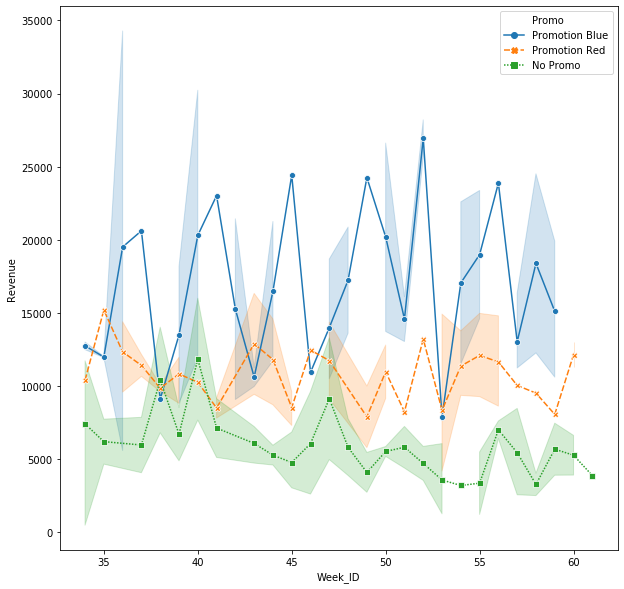

In [242]:
# Investigating Revenue by Week_ID based on Promo.
fig,ax=plt.subplots(figsize=(10,10))
ax=sns.lineplot(x="Week_ID",y="Revenue",hue="Promo",style="Promo",markers=True, data=df)

### Remark:
* Promotiom Blue has the highest performance, generating highest revenues than the other two categories.

### 2.2) Bar Plots

,Month_ID,Revenue
0,11,247620
1,12,361702
2,13,297244
3,14,299149
4,15,327216
5,16,324195
6,17,68724


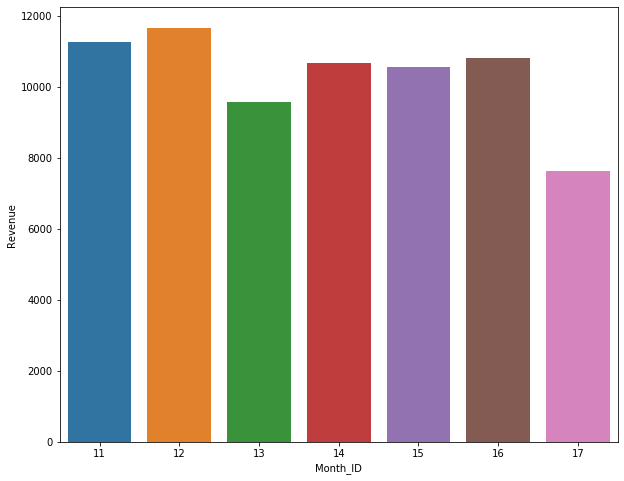

In [243]:
# Displaying sum of Total Revenue by Month_ID
fig,ax=plt.subplots(figsize=(10,8))
ax=sns.barplot(x="Month_ID",y="Revenue",data=df,ci=None)
df[["Revenue","Month_ID"]].groupby("Month_ID",as_index=False).agg({'Revenue':'sum'})

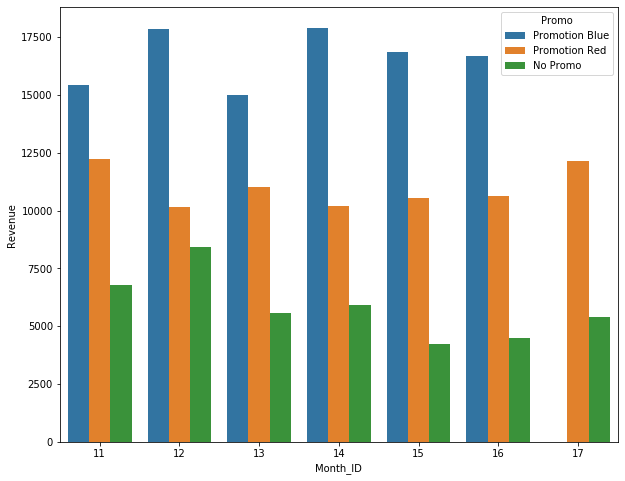

In [244]:
# Investigate Revenue by Month_ID using Promo as category.
fig,ax=plt.subplots(figsize=(10,8))
ax=sns.barplot(x="Month_ID",y="Revenue",data=df,ci=None,hue="Promo")

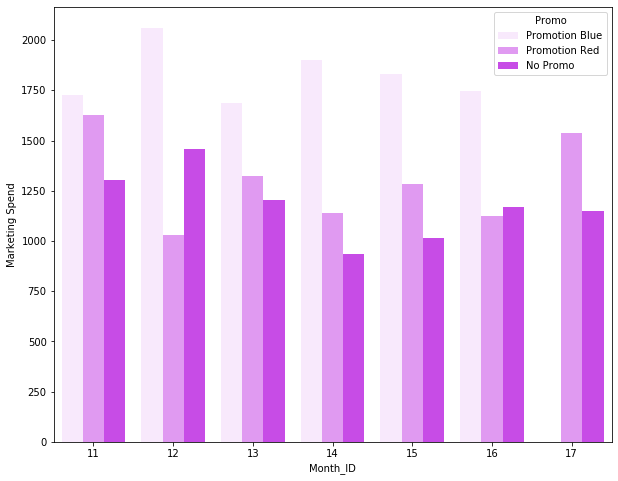

In [245]:
# Investigate Marketing Spend by Month_ID using Promo as category.
fig,ax=plt.subplots(figsize=(10,8))
ax=sns.barplot(x="Month_ID",y="Marketing Spend",data=df,ci=None,hue="Promo",color="#D733FF")


### 2.3) Histograms & Density function.

10581.593406593407


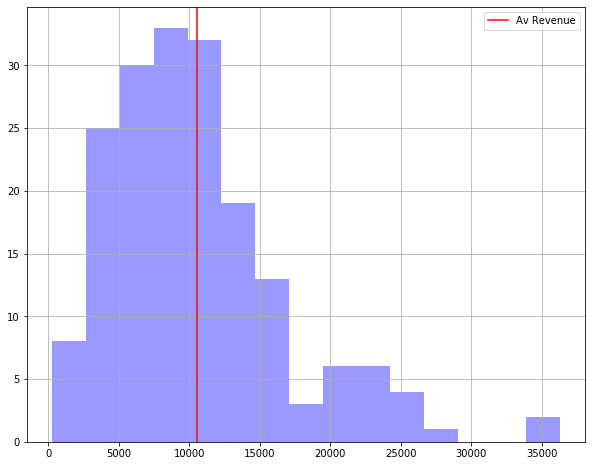

In [246]:
# Investigating the distribution of Revenue.
fig,ax=plt.subplots(figsize=(10,8))
Rev=df["Revenue"].values
ax=sns.distplot(Rev,color="blue",kde=False)

# Calculating the mean
mean=(df["Revenue"].mean())
print(mean)

# ploting the mean
plt.axvline(mean,color="red",label="Av Revenue")
plt.legend()
plt.grid()

#### Remarks:
* It is a right(positive) skwed distribution as the mean is to the right of the distribution(not exactly at the middle of the distribution) 
* Therefore the mean is greater than the median of the distribution.

1666.7307692307693


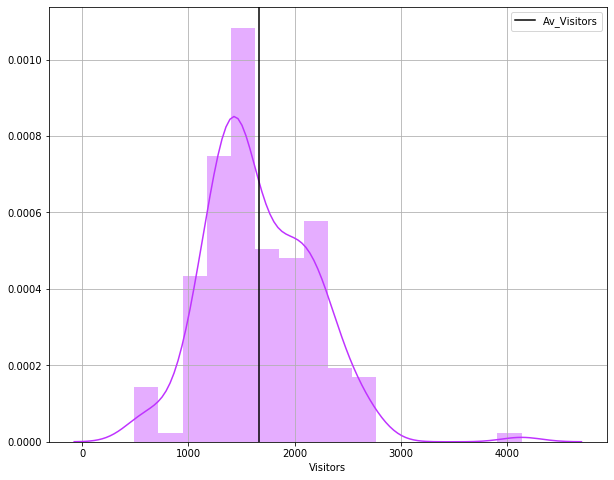

In [202]:
# Investigating the distribution of visitors.
fig,ax=plt.subplots(figsize=(10,8))
ax=sns.distplot(df['Visitors'],color="#BF33FF")

# Calculating the mean
mean=df["Visitors"].mean()
print(mean)

# Ploting the mean
plt.axvline(mean,color="black",label='Av_Visitors')
plt.legend()
plt.grid()

### Remarks:
* The distribution of Revenue and Visitors are slightly right skwed distibution since both means are to the right of the distributions.
* In general one can say both distributions are normal distributions.

### 2.4) Box Plots

9452.0


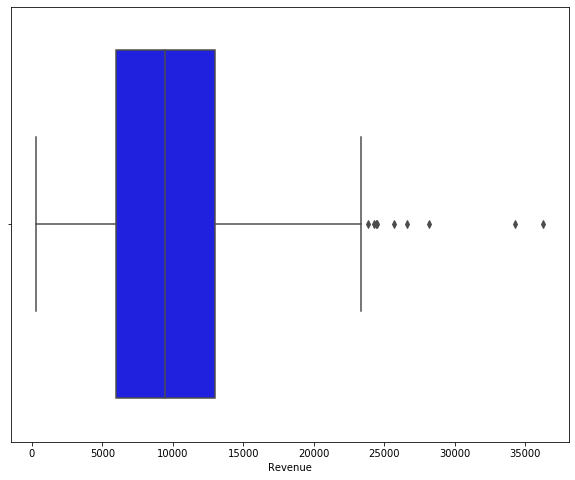

In [247]:
# Investigating the distribution of Revenue
fig,ax=plt.subplots(figsize=(10,8))
ax=sns.boxplot(df["Revenue"],color="blue")

# Calculating the median val of Revenue
median=df["Revenue"].median()
print(median)

### Remarks:
* The middle line of the box represents the median
* The first line of the box is the start Q1(25th percentile) and the end of the box line is Q3(75th percentile) 
* The whiskers (left to right) show the minimum and amximum quartiles.
* The dots to the far right are the outliers.

9452.0


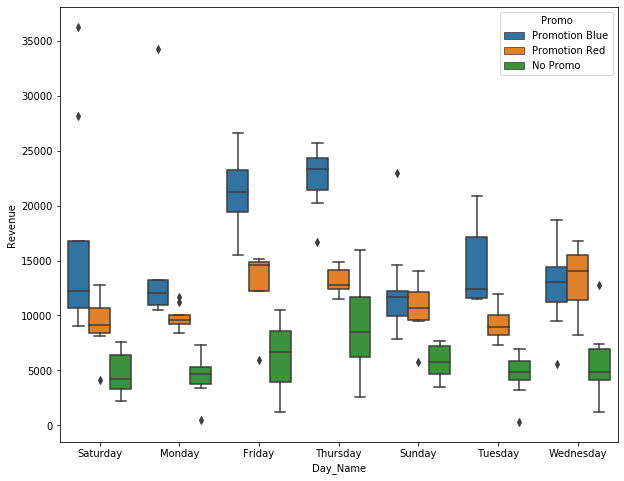

In [248]:
# Investigating the distribution of Revenue by Day_Name
fig,ax=plt.subplots(figsize=(10,8))
ax=sns.boxplot(x="Day_Name",y="Revenue",hue="Promo",data=df)

# Calculating the median val of Revenue
median=df["Revenue"].median()
print(median)

### Remarks:
* The day with the highest Revenue is Friday and that with the lowest is Saturday.
* Also Promotion Blue generates most Revenue

### 2.5) Scatter Plots

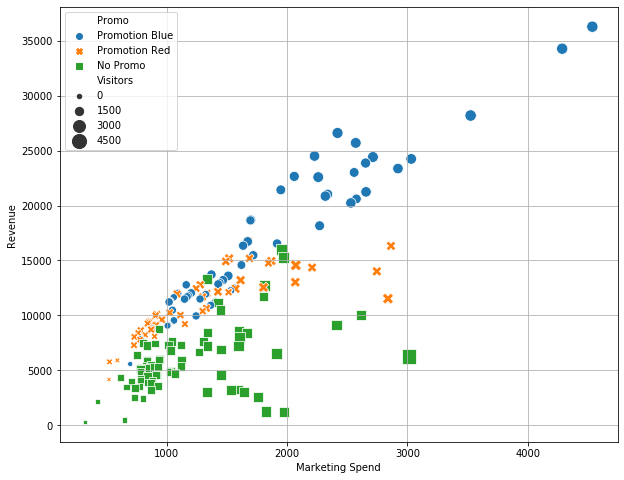

In [249]:
# Investigating the realatioship between Marketing Spend and Revenue using Promo as a category and Visitors as an indicator.
fig,ax=plt.subplots(figsize=(10,8))
ax=sns.scatterplot(x="Marketing Spend",y="Revenue",data=df, color='red',hue="Promo",style="Promo",size="Visitors",sizes=(20,200))
plt.grid()

### Remarks:
* Increasing Marketing Spend on Promo increases revenue, 
* Also generally increasing Promotions leads to increase in the number of Visitors as indicated by the increase in the sizes of green sqs.
* We also noticed a few increase in Visitors due to high Market spend even at a low promo rate as shown by the blue round dots.

### 2.6) Lmplot

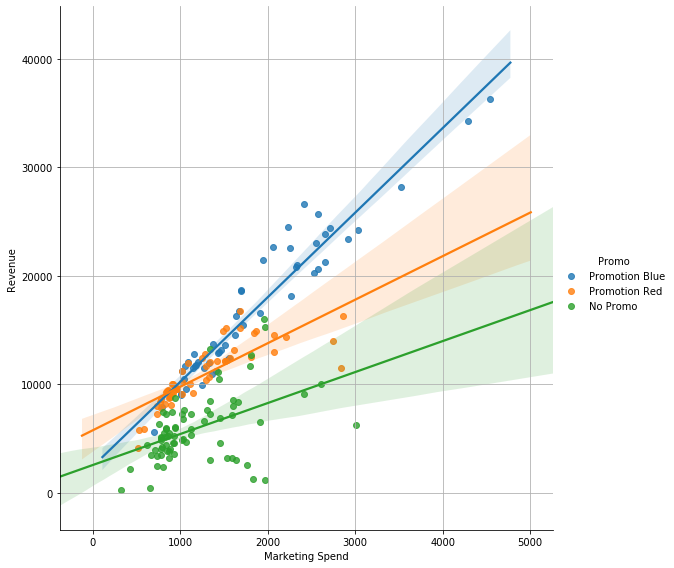

In [209]:
# Dispalying the relationship between Marketing spend and Revenu- changing color, hue & style
ax=sns.lmplot(x="Marketing Spend",y ="Revenue", data=df, height=8, hue="Promo")
plt.grid()

### 3.0) Heat Map

#### Notes:
- First we are going to create a dataset that we will display on the heat map-we will use a correlation dataset
- .corr() is used to find all the pairwise correlation of all the columns of the dataframe. Any null values are automatically left out.
- the .corr() compairs the values of the variables between 0-1.
- closser to -1(negative corr), +1(+ corr)
- The closer to 1,or -1 the better.As one variable increse, the other also tends to increase/decrease.

In [250]:
# Running a heat map for data frame pc
pc=df[['Visitors','Revenue','Marketing Spend']].corr()
pc

,Visitors,Revenue,Marketing Spend
Visitors,1.000000,0.573842,0.824810
Revenue,0.573842,1.000000,0.790425
Marketing Spend,0.824810,0.790425,1.000000


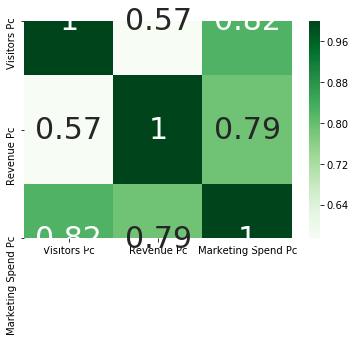

In [251]:
col=['Visitors Pc','Revenue Pc','Marketing Spend Pc']
hm=sns.heatmap(pc,annot=True, annot_kws={"size":30},xticklabels=col,yticklabels=col,cmap="Greens")

### Remarks:
* The scale starts from somewhere around 0.57, this is because the starting point is always a value closser to the lowest value of the corr dataframe (pc)
* The more darker the color, the lower the pearson corr is between the variables, and the lighter the color is, the stronger the corr.
* From the heatmap, we see a lower correlation between Revenue and Visitors and a stronger correlation between Marketing Spend and Revenue generated.

[Click here to return to the top of the page](#top_page)